In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

def derivative(f, var) :
    
    if var.ndim == 1 :
        
        temp_var = var
        delta = 1e-5
        diff_val = np.zeros(var.shape)

        for index in range(len(var)) :
            
            target_var = float(temp_var[index])
            
            temp_var[index] = target_var + delta
            func_val_plust_delta = f(temp_var)
            
            temp_var[index] = target_var - delta
            func_val_minus_delta = f(temp_var)
            
            diff_val[index] = (func_val_plust_delta - func_val_minus_delta) / (2 * delta)
            
            temp_var[index] = target_var
            
        return diff_val
    
    elif var.ndim == 2 :
        
        temp_var = var
        delta = 1e-5
        diff_val = np.zeros(var.shape)
        
        rows = var.shape[0]
        columns = var.shape[1]
        
        for row in range(rows) :
            for column in range(columns) :
                
                target_var = float(temp_var[row, column])
                
                temp_var[row, column] = target_var + delta
                func_val_plus_delta = f(temp_var)
                
                temp_var[row, column] = target_var - delta
                func_val_minus_delta = f(temp_var)
                
                diff_val[row, column] = (func_val_plus_delta - func_val_minus_delta) / (2 * delta)
                
                temp_var[row, column] = target_var
                
        return diff_val


def sigmoid(x) :
    return 1 / (1+np.exp(-x))



In [2]:
# image = training_data[ 0, 1: ].reshape(28, 28)

# plt.imshow(image, cmap='gray')
# plt.show()

In [3]:
class MNIST_Test :
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate) :
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)
        
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)
        
        self.learning_rate = learning_rate
        
        print("MNIST_Test object is created !!!")
        
    def feed_forward(self) :
        
        delta = 1e-7
        
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        return -np.sum(self.target_data*np.log(y+delta) + (1-self.target_data)*np.log((1-y)+delta))
   
#     def get_W_b(self) :
#         
#         return self.W2, self.b2, self.W3, self.b3

    def loss_val(self) :
        
        delta = 1e-7
        
        z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        return -np.sum(self.target_data*np.log(y+delta) + (1-self.target_data)*np.log((1-y)+delta))
            
    def predict(self, input_data) :
        
        z2 = np.dot(input_data, self.W2) + self.b2
        a2 = sigmoid(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(z3)
        
        predicted_num = np.argmax(y)
        
        return predicted_num
        
    def accuracy(self, input_data, target_data) :
        
        matched_list = []
        not_matched_list = []
        
        index_label_prediction_list = []
        
        temp_list= []
        
        for index in range(len(input_data)) :
            
            label = int(target_data[index])
            
            data = (input_data[index, : ] / 255.0 * 0.99) + 0.01
            
            predicted_num = self.predict(data)
            
            if label == predicted_num :
                
                matched_list.append(index)
                
            else :
                
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(label)
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        print("Current Accuracy = ", len(matched_list) / (len(input_data)))
        
        return matched_list, not_matched_list, index_label_prediction_list

    def train(self, input_data, target_data) :
        
        self.input_data = input_data
        self.target_data = target_data
        
        f = lambda x : self.feed_forward()
        
        self.W2 -= self.learning_rate * derivative(f, self.W2)
        self.b2 -= self.learning_rate * derivative(f, self.b2)
        self.W3 -= self.learning_rate * derivative(f, self.W3)
        self.b3 -= self.learning_rate * derivative(f, self.b3)
        

In [5]:
training_data = np.loadtxt('./mnist_train.csv', delimiter=',', dtype=np.float32)
print('training_data.shape = ', training_data.shape)

training_data.shape =  (60000, 785)


In [6]:
i_nodes = training_data.shape[1] - 1
h1_nodes = 30
o_nodes = 10
lr = 1e-2
epochs = 1

loss_val_list = []

obj = MNIST_Test(i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs) :
    
    for index in range(len(training_data)) :
        
        input_data = ((training_data[index, 1: ] / 255.0) * 0.99) + 0.01
        
        target_data = np.zeros(o_nodes) + 0.01
        target_data[int(training_data[index, 0])] = 0.99
        
        obj.train(input_data, target_data)
        
        if (index % 200 == 0) :
            print("epochs = ", step, ", index = ", index, " , loss_value = ", obj.loss_val())
            
        loss_val_list.append(obj.loss_val())
        
end_time = datetime.now()

print("")
print("Elapsed Time => ", end_time - start_time)

MNIST_Test object is created !!!
epochs =  0 , index =  0  , loss_value =  10.530093183808887


KeyboardInterrupt: 

In [7]:
test_data = np.loadtxt('./mnist_test.csv', delimiter=',', dtype=np.float32)
print('test_data.shape = ', test_data.shape)

test_input_data = test_data[ : , 1: ]
test_target_data = test_data[ : , 0 ]

(true_list_1, false_list_1, index_label_prediction_list) = obj.accuracy(test_input_data, test_target_data)

test_data.shape =  (10000, 785)
Current Accuracy =  0.0996


ValueError: x and y must have same first dimension, but have shapes (60000,) and (11,)

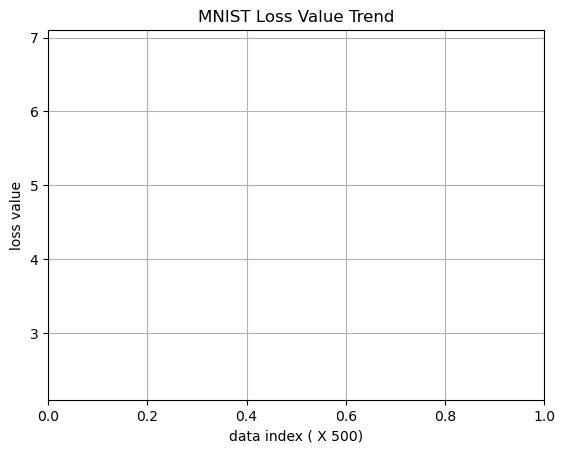

In [9]:
x_data_list = [ index for index in range(len(training_data))]
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 500) :
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title("MNIST Loss Value Trend")
plt.xlabel('data index ( X 500)')
plt.ylabel('loss value')
plt.grid()

plt.ylim(2.1, 7.1)
plt.plot(x_data_list, loss_val_list, color='b')
plt.plot(Y_DATA_LIST, color='b')
plt.show()

In [1]:
import numpy as np
o_nodes = 10
target_data = np.zeros(o_nodes) + 0.01
print(target_data)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
